<a href="https://colab.research.google.com/github/EshaSawant/DataScienceProject/blob/main/Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Final Project

In this project we are given a custom made dataset by Dr. Bruns. It has unnamed columns and most of the columns are categorical. The target variable is also categorical therefore I trained the classification algorithm to predict if the target is 1 or 0. 
The dataset has 6747 rows and 12 columns.  

Esha Sawant

## Read Data

In [ ]:
#Importing all the required functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics._plot.precision_recall_curve import PrecisionRecallDisplay
from sklearn.metrics._plot.roc_curve import RocCurveDisplay
from sklearn.metrics import plot_precision_recall_curve, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
import graphviz

import warnings
warnings.filterwarnings('ignore')

In [ ]:
sns.set()
sns.set_context('talk')

rcParams['figure.figsize']=8,6

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/EshaSawant/DataScienceProject/main/final31-Esha.csv")

## Initial Data Exploration

Overview of the entire dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6747 entries, 0 to 6746
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      6633 non-null   object 
 1   x1      6747 non-null   object 
 2   x2      6747 non-null   object 
 3   x3      6303 non-null   float64
 4   x4      6747 non-null   object 
 5   x5      6747 non-null   object 
 6   x6      6747 non-null   object 
 7   x7      6747 non-null   object 
 8   x8      6747 non-null   object 
 9   x9      6747 non-null   object 
 10  x10     6747 non-null   float64
 11  y       5904 non-null   object 
dtypes: float64(2), object(10)
memory usage: 632.7+ KB


In [ ]:
#The first 10 rows of dataset
df.head(10)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,A0,A0,A0,67.0,A0,A0,A0,A0,A0,A0,19.40,A0
1,A1,A0,A0,34.0,A0,A1,A1,A1,A1,A1,62.65,A1
2,A2,A0,A1,30.0,A0,A0,A0,A0,A0,A2,19.70,A0
3,A3,A0,A1,41.0,A0,A1,A2,A1,A2,A1,106.30,A1
4,A4,A0,A1,21.0,A0,A1,A2,A1,A2,A0,99.85,A0
5,A5,A0,A0,57.0,A0,A0,A0,A0,A0,A3,19.60,A0
6,A6,A1,A1,72.0,A0,A1,A2,A1,A2,A3,113.80,A0
7,A7,A0,A1,1.0,A0,A0,A0,A0,A0,A0,20.55,A0
8,NaN,A0,A1,60.0,A0,A1,A2,A2,A1,A1,89.55,A0
9,A9,A0,A0,40.0,A0,A1,A1,A1,A1,A0,56.60,NaN


In [ ]:
#Number of unique values in each column
df.nunique().sort_values(ascending=False)

x0     6633
x10    1573
x3       80
x9        4
x8        3
x7        3
x6        3
x5        3
y         2
x4        2
x2        2
x1        2
dtype: int64

In [ ]:
#Overview of the float variables
df.describe()

,x3,x10
count,6303.000000,6747.000000
mean,32.421058,64.850845
std,27.846661,30.078343
min,-394.931898,18.250000
25%,9.000000,35.625000
50%,29.000000,70.450000
75%,56.000000,89.850000
max,459.517764,118.750000


The min and max distribution of column 'x3' looks skewed, lets visualize for a more clear preprocessing.

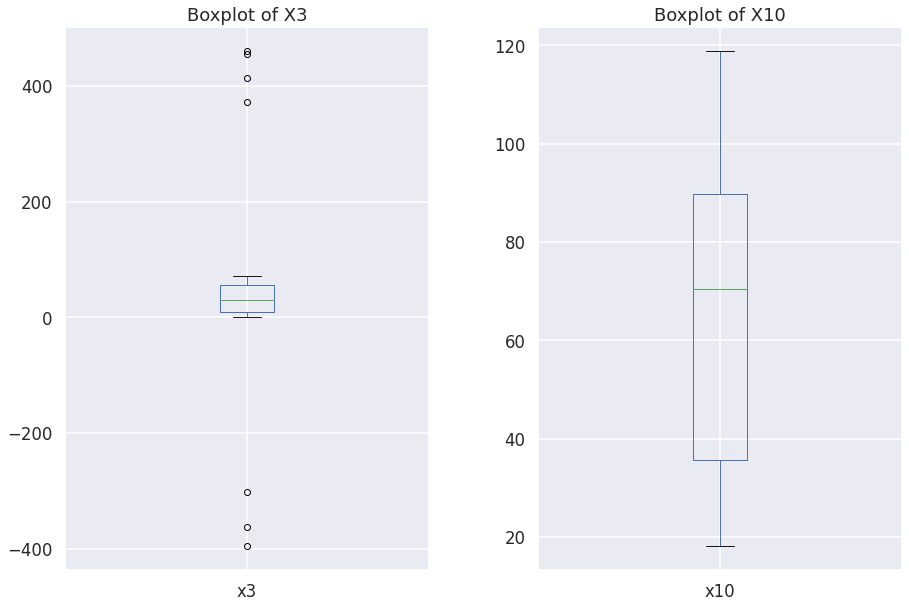

In [ ]:
fig = plt.figure(figsize=(15, 10))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)
plt.subplot(1,2,1);
df['x3'].plot.box()
plt.title('Boxplot of X3');
plt.subplot(1,2,2);
df['x10'].plot.box()
plt.title('Boxplot of X10');

Distribution of x5 and x7

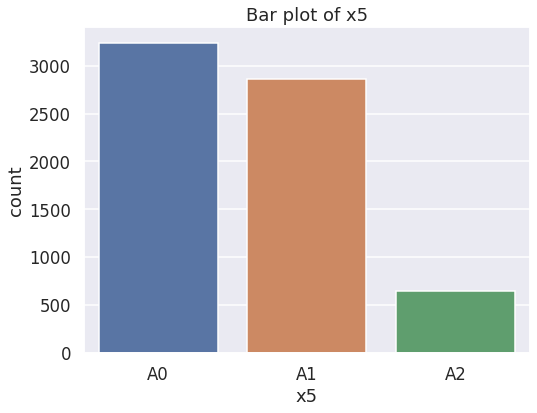

In [ ]:
sns.countplot(df['x5'])
plt.title('Bar plot of x5');

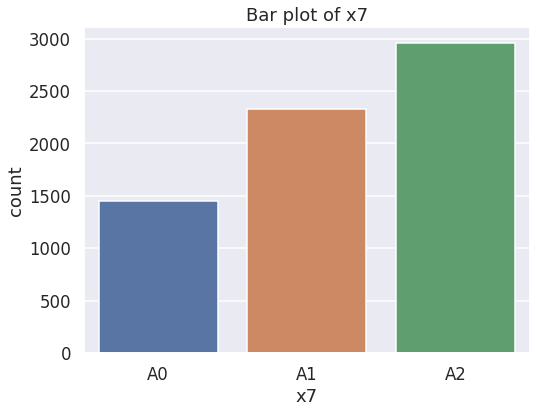

In [ ]:
sns.countplot(df['x7'])
plt.title('Bar plot of x7');

The values in x5 mainly contain A0 values and x7 contain mainly A2 values.

## Data Preprocessing

Fraction of NA values in the dataset

In [ ]:
print("Fraction of NA values: {:.3f}%".format(df.isna().mean().mean()))

Fraction of NA values: 0.017%


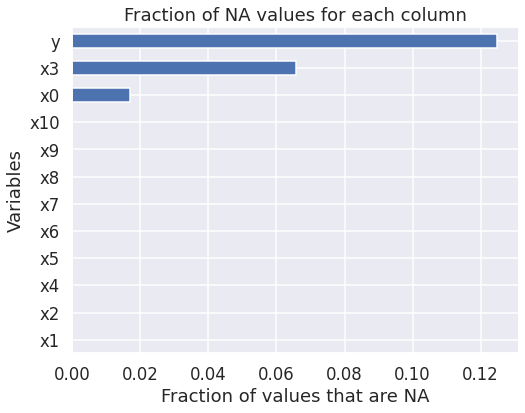

In [ ]:
df.isna().mean().sort_values().plot.barh()
plt.xlabel('Fraction of values that are NA')
plt.ylabel('Variables')
plt.title('Fraction of NA values for each column');

As seen the 17% of the NA values are contained in the columns 'y', 'x3' and 'x0', lets look at the them individually.  

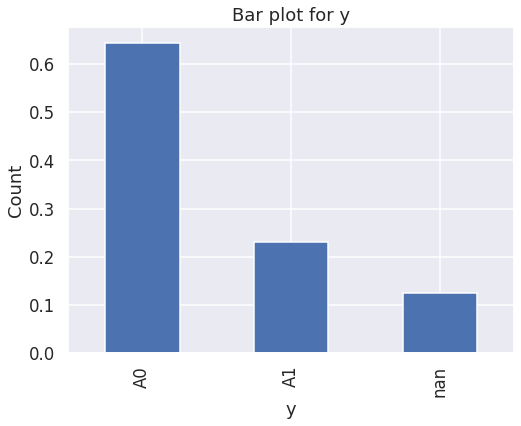

In [ ]:
df['y'].value_counts(dropna=False,normalize=True).plot.bar()
plt.title("Bar plot for y")
plt.xlabel('y')
plt.ylabel('Count');

Dealing with the NA values and the bad data in X3. Since X0 has a lot of unique values and would not help much in the machine learning process, we are dropping the whole column for convience. 
Since 'y' is the target variable, we are imputing its NA values with mode of the column

In [ ]:
#Fill na values in y by its mode
y_mode=df['y'].mode()[0]
df['y'].fillna(y_mode,inplace=True)

#clip the dataframe to only consider values where x3 is between 0 to 71
df=df[df['x3']<=71]
df=df[df['x3']>=0]

#since X0 has a lot of unique values, its would be better to drop the whole column
df.drop(['x0'],axis=1,inplace=True)

In [ ]:
print("Fraction of NA values after cleaning: {:.1f}%".format(df.isna().mean().mean()))

Fraction of NA values after cleaning: 0.0%


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5965 entries, 0 to 6746
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      5965 non-null   object 
 1   x2      5965 non-null   object 
 2   x3      5965 non-null   float64
 3   x4      5965 non-null   object 
 4   x5      5965 non-null   object 
 5   x6      5965 non-null   object 
 6   x7      5965 non-null   object 
 7   x8      5965 non-null   object 
 8   x9      5965 non-null   object 
 9   x10     5965 non-null   float64
 10  y       5965 non-null   object 
dtypes: float64(2), object(9)
memory usage: 559.2+ KB


## Data Visualization

What is the distribution in column 'x6'

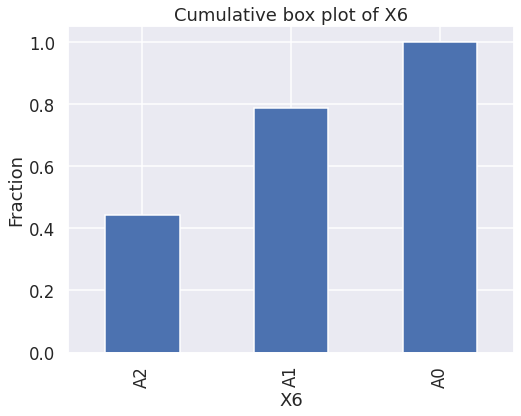

In [ ]:
df['x6'].value_counts(normalize=True).cumsum().plot.bar()
plt.title("Cumulative box plot of X6")
plt.xlabel('X6')
plt.ylabel('Fraction');

Since 'x6' is a categorical column, it has a lot of 'A0' values, the above graph shows the cumulative distribution in the column. 

What's the trend in the column 'x3'?

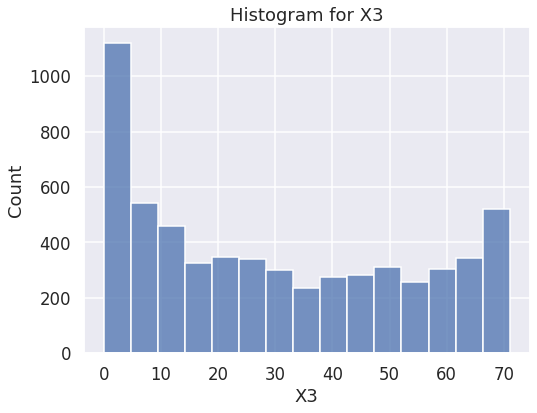

In [ ]:
sns.histplot(df['x3'])
plt.title('Histogram for X3')
plt.ylabel('Count')
plt.xlabel('X3');

The outliers in x3 were removed, the current dataset only contains values from 0 to 70, where the count of 0 is the highest

What is the distribution of x3 in each categories of x2?

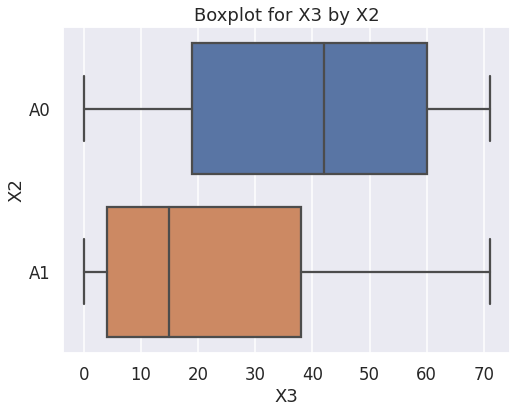

In [ ]:
sns.boxplot(x=df['x3'],y=df['x2'])
plt.title('Boxplot for X3 by X2')
plt.xlabel('X3')
plt.ylabel('X2');

A0 in x2 are more concentrated between the range 20 to 60 whereas A1 are concentrated from 5 to 40.

What about the distribution in x8, grouped by categories in x9?

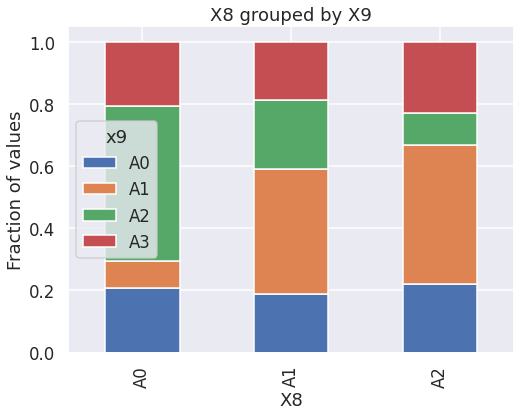

In [ ]:
pd.crosstab(df['x8'],df['x9'],normalize='index').plot.bar(stacked=True)
plt.title('X8 grouped by X9')
plt.xlabel('X8')
plt.ylabel('Fraction of values');

The graph above shows that A0 values in x8 have more A2 matches, the A2 values in x8 have more A1 values. 

What about the distribution of x3 grouped by y?

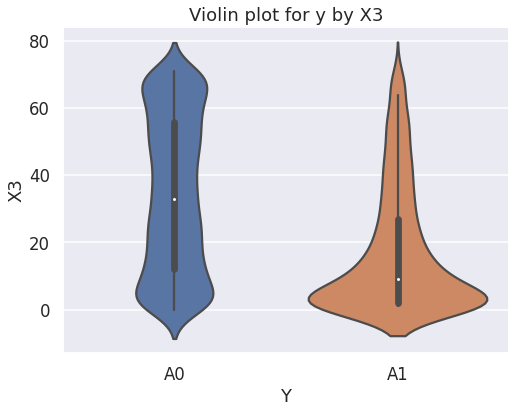

In [ ]:
sns.violinplot(y=df['x3'],x=df['y'])
plt.title('Violin plot for y by X3')
plt.xlabel('Y')
plt.ylabel('X3');

The x3 values in each categories of y, of the zero values are in A1 while A0 has a more equal distribution. 

## Machine Learning

Encoding the target variable as numbers using a defined function. 

In [ ]:
def changeY(s):
    if(s=='A0'):
        return 0
    else:
        return 1
    
df['y']=df['y'].apply(changeY)

Encoding the remaining categorical variables as numbers using dummy variables method. 

In [ ]:
df=pd.get_dummies(df,drop_first=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5965 entries, 0 to 6746
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x3      5965 non-null   float64
 1   x10     5965 non-null   float64
 2   y       5965 non-null   int64  
 3   x1_A1   5965 non-null   uint8  
 4   x2_A1   5965 non-null   uint8  
 5   x4_A1   5965 non-null   uint8  
 6   x5_A1   5965 non-null   uint8  
 7   x5_A2   5965 non-null   uint8  
 8   x6_A1   5965 non-null   uint8  
 9   x6_A2   5965 non-null   uint8  
 10  x7_A1   5965 non-null   uint8  
 11  x7_A2   5965 non-null   uint8  
 12  x8_A1   5965 non-null   uint8  
 13  x8_A2   5965 non-null   uint8  
 14  x9_A1   5965 non-null   uint8  
 15  x9_A2   5965 non-null   uint8  
 16  x9_A3   5965 non-null   uint8  
dtypes: float64(2), int64(1), uint8(14)
memory usage: 428.0 KB


After encoding, we get 16 predictor columns and y as the target. 

Defining the pandas dataframe to numpy arrays, and perform a train/test split. All the variables except y are used as the predictors. 

In [ ]:
target='y'
predictors=list(df.columns)
predictors.remove(target)

X=df[predictors].values
y=df[target].values
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

Sanity check on training data

In [ ]:
print(X_train.shape)
print(y_train.shape)

(4175, 16)
(4175,)


Calculating baseline accuracy: The baseline accuracy in a classification problem tell us the accuracy we could achivev if we simply guessed the majority class. 

In [ ]:
baseline_acc=(y_train==pd.Series(y_train).mode()[0]).mean()
print("Baseline accuracy: {:.3f}".format(baseline_acc))

Baseline accuracy: 0.756


### Classification Tree

We will start with a flexible model in an attempt to achieve overfitting. We will then tune the hyperparameters to achieve a more accurate model. Setting max depth to 11 will probably give us an overfitted model. 

In [ ]:
clf=DecisionTreeClassifier(max_depth=11)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=11)

In [ ]:
#Function to plot a decision tree
def plot_tree_custom(clf):    
    target_names = ['A0', 'A1']
    dot_data = export_graphviz(clf, precision=2,
                         feature_names=predictors,  
                         proportion=True,
                         class_names=target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)

    graph = graphviz.Source(dot_data)  
    return graph

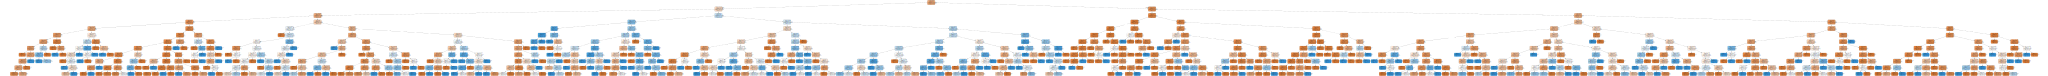

In [ ]:
plot_tree_custom(clf.fit(X_train,y_train))

In [ ]:
def plot_learning_curve_tree(clf, X_train, y_train):
    train_sizes, train_scores, test_scores = \
    learning_curve(clf, X_train, y_train, cv=10, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    # plot the learning curve
    plt.plot(train_sizes, train_scores_mean, label='train')
    plt.plot(train_sizes, test_scores_mean, label='test')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.title('Learning curve, classification tree')
    plt.legend();

A learning curve will show whether we are in a high bias or a high variance situation. 

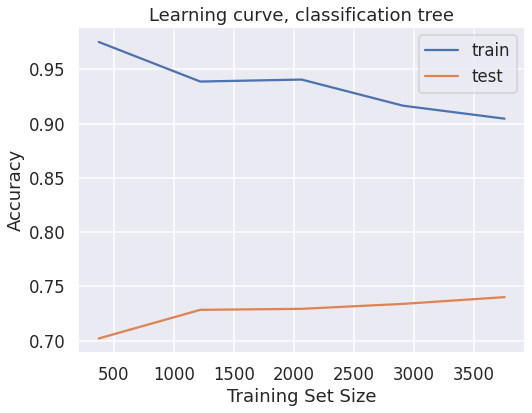

In [ ]:
plot_learning_curve_tree(clf,X_train,y_train)

The graph shows a high variance situation, which indicates overfitting 

With decision tree classifier we achieve a cross validation accuracy of about 73%. 

In [ ]:
score=cross_val_score(clf,X_train,y_train,cv=10)
print("Cross-validation accuracy: {:.3f}".format(score.mean()))

Cross-validation accuracy: 0.739


Since there are lots of hyperparameters we can tune for a decision tree classifier, we will use grid search to find the best parameters for the classifier.

In [ ]:
#max depth: values 2 to 15 
#min_samples: values 10-100 with jump of 10
#max_features: values 'auto', 'sqrt' and None

grid=[{'max_depth':range(2,15),'max_features':['sqrt','auto',None],'min_samples_leaf':range(10,100,10)}]
tree_cv= GridSearchCV(DecisionTreeClassifier(),grid,cv=10,scoring='accuracy')
tree_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': range(2, 15),
                          'max_features': ['sqrt', 'auto', None],
                          'min_samples_leaf': range(10, 100, 10)}],
             scoring='accuracy')

From the grid search, we will look at the best parameters for classification tree. As seen a depth of 5 is good, and leaf nodes with 90 training example would give us a good training model. 

In [ ]:
print(tree_cv.best_params_)

{'max_depth': 5, 'max_features': None, 'min_samples_leaf': 90}


The cross validation accuracy for the best tree is about 79%, which is 6% better than the overfitted tree. 

In [ ]:
score=tree_cv.best_score_
print('Top accuracy from grid search: {:.3f}%'.format(score.mean()))

Top accuracy from grid search: 0.793%


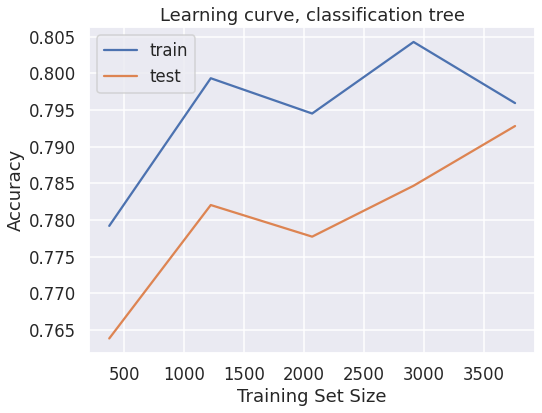

In [ ]:
plot_learning_curve_tree(tree_cv.best_estimator_,X_train,y_train)

The learning curve looks good at the first glance, there is not a lot of difference between training and test accuracy. Looks like if the model is fed with more data, the model will achieve a high bias 

In [ ]:
train_acc=tree_cv.best_estimator_.score(X_train,y_train)
print("Training accuracy for best parameters: {:.3f}%".format(train_acc))

Training accuracy for best parameters: 0.796%


In [ ]:
test_acc=tree_cv.best_estimator_.score(X_test,y_test)
print("Test Accuracy for best parameters: {:.3f}%".format(test_acc))

Test Accuracy for best parameters: 0.794%


The model is flexible enough to give us a training accuracy of 79.6% and test accuracy of 79.4%. There is not a lot of difference, but since the test data consists of only 30% data of the entire dataset. 

Getting the important features of a model, will tell us which predictors are responsible for reducing the Gini values.

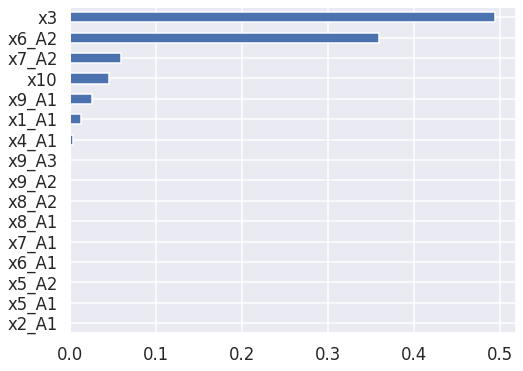

In [ ]:
feature=tree_cv.best_estimator_.feature_importances_
imp_features=pd.Series(feature,index=predictors).sort_values().plot.barh()

Looking at the graph, we can say that x3 is by far the most important feature. 

In [ ]:
#Performing forward feature selection
def forward_selection_classif(clf, X, y, threshold=None, num_folds=5):
    remaining = list(range(X.shape[1]))
    selected = []
    accuracies = []
    previous_best = 0.0
    while len(remaining) > 0:
        
        best_i, best_accuracy = 0, 0.0
        for i in remaining:
            accuracy = cross_val_score(clf, X[:,selected+[i]], y, cv=num_folds).mean()
            if accuracy > best_accuracy:
                best_i, best_accuracy = i, accuracy
                
        if (threshold is not None) and (best_accuracy - previous_best) < threshold:
             break
        selected.append(best_i)
        accuracies.append(best_accuracy)
        remaining.remove(best_i)
        previous_best = best_accuracy
    return np.array(selected), accuracies

In [ ]:
def plot_selected(selected, accuracies, predictors):
    pd.Series(accuracies, index=predictors[selected]).plot.barh()
    plt.xlim(0.5, 1.0)
    plt.xlabel('Cross-validation accuracy')
    plt.title('Result of forward feature selection')

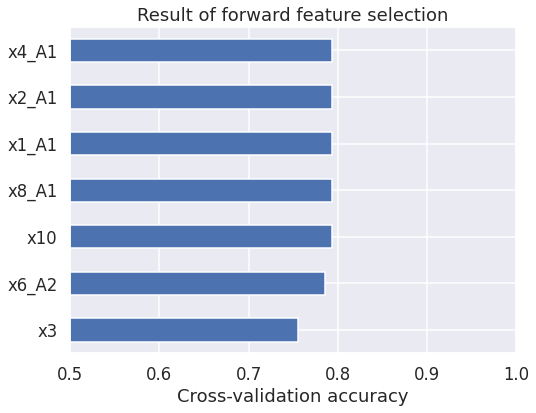

In [ ]:
selected, accuracies = forward_selection_classif(tree_cv.best_estimator_, X_train, y_train, num_folds=10)
plot_selected(selected[:7], accuracies[:7], np.array(predictors))

### Logistic Regression

Just to be safe, we will set the predictors and target values again before we start performing logistic regression.

In [ ]:
target='y'
predictors=list(df.columns)
predictors.remove(target)

X=df[predictors].values
y=df[target].values
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

Defining the logistic regression model and setting the max iterations value to 1000.

In [ ]:
regr= LogisticRegression(max_iter=1000)
regr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

Fitting the logistic regression model to X_train and y_train. To perform prediction on X_test.

In [ ]:
y_pred=regr.predict(X_test)

Test accuracy for logistic regression model comes to around 80%

In [ ]:
acc=(y_pred==y_test).mean()
print("Predicted Accuracy: {:.3f}%".format(acc))

Predicted Accuracy: 0.798%


In [ ]:
#Function to plot learning curve
def plot_learning_curve_log(clf, X_train, y_train):
    train_sizes, train_scores, test_scores = \
    learning_curve(clf, X_train, y_train, cv=10, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    # plot the learning curve
    plt.plot(train_sizes, train_scores_mean, label='train')
    plt.plot(train_sizes, test_scores_mean, label='test')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.title('Learning curve, Logistic Regression')
    plt.legend();

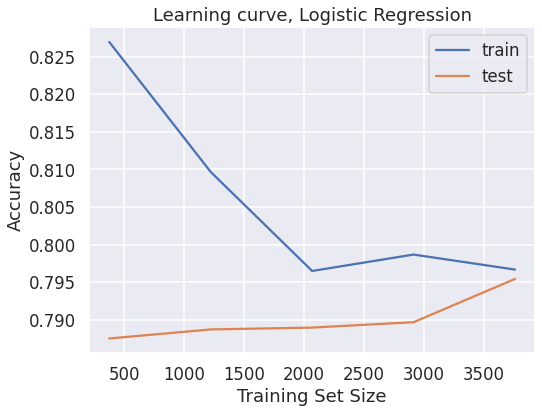

In [ ]:
plot_learning_curve_log(regr,X_train,y_train)

The learning curve shows a high bias as it is coming together faster, accuracy is smaller as the dataset grows in size. 

ROC curve is a plot containing Recall on the x-axis and the precision on y-axis. Precision helps highlight how relevant the retrieved results are. 

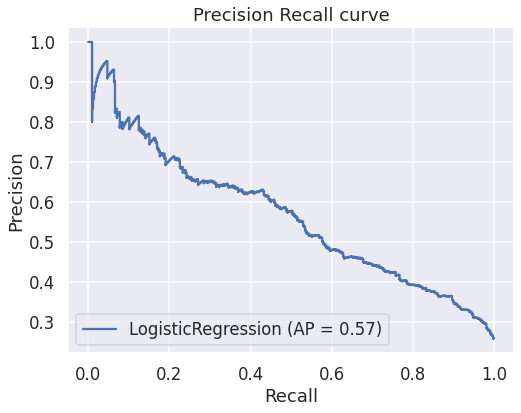

In [ ]:
plot_precision_recall_curve(regr,X_test,y_test)
plt.title("Precision Recall curve")
plt.xlabel('Recall')
plt.ylabel('Precision');

The PR curve shows the precision and recall for different threshold values. It is used for evaluating the performance of binary classification algorithms like logistic regression. 
The precision is correspondingly high, and at very high recall the precision begins to drop. Looks like both classifier can achieve a precision score of about 0.5 while only sacrificing minimal recall.  

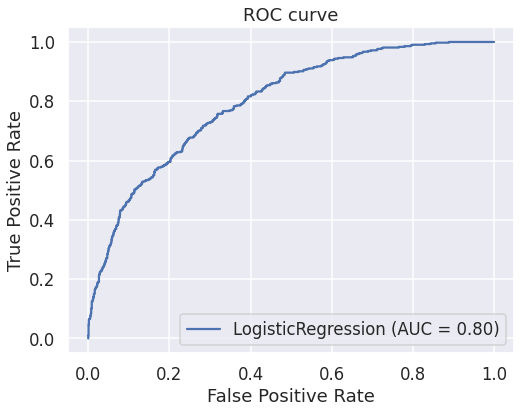

In [ ]:
RocCurveDisplay.from_estimator(regr,X_test,y_test)
plt.title("ROC curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

For evaluating the performance for the logistic regression model, we will plot a ROC curve. It is one of the most important evaluation metrics for checking any classification model's performance. 


## Cluster Analysis

Performing cluster analysis for numeric values in the dataset.

In [ ]:
kmeans=KMeans(n_clusters=5,random_state=0)
cluster_nums=kmeans.fit_predict(df[['x3','x10']])

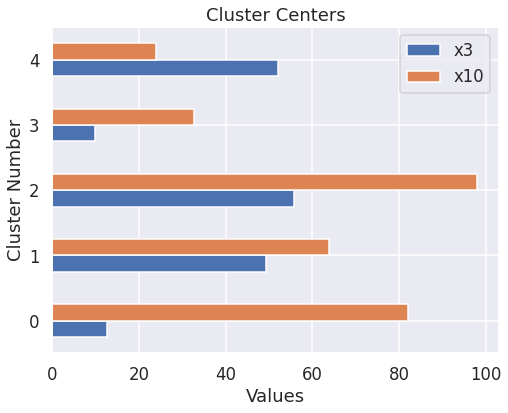

In [ ]:
centers=pd.DataFrame(np.round(kmeans.cluster_centers_,1),columns=['x3','x10'])
centers.plot.barh()
plt.title('Cluster Centers')
plt.xlabel('Values')
plt.ylabel('Cluster Number');

## Conclusion

In this report, we have tested 2 classification models on predicting 'y', based on all the columns in the dataset. About 75% of y is 0 therefore, we can achieve about 75% by guessing. Our classifer has a test accuracy of 79%, which is a bit better than the baseline accuracy. 

The model is only basing its accuracy on 7 of the total 16 features. Interesting Logistic regression performed much better than tree classification. 